In [4]:
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn

print(sklearn.__version__)

1.5.1


## Data generation

In [3]:
x= np.arange(1, 30, 2, dtype = np.int16)
y = 2*x + 1
y_random = y + np.random.normal(0, 8, 15)

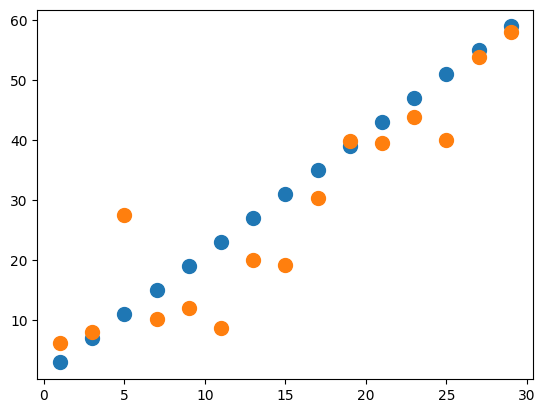

In [9]:
plt.plot(x, y, ".", markersize = 20)
plt.plot(x, y_random, ".", markersize = 20)
plt.show()

## Parameter estimation
$\beta_1 = \frac{S_{xy}}{S_{xx}}$
$\beta_0 = \overline{y} - \beta_1\overline{x}$

In [10]:
Sxy = (x - np.mean(x))*(y_random - np.mean(y_random))
Sxx = (x - np.mean(x))**2

Sxy = Sxy.sum()
Sxx = Sxx.sum()

beta_1 = Sxy/Sxx
beta_0 = np.mean(y_random) - beta_1*np.mean(x)           

# print(Sxy)
# print(Sxx)

print("beta_1 = {}".format(beta_1.round(3)))
print("beta_0 = {}".format(beta_0.round(3)))

beta_1 = 1.767
beta_0 = 1.379


In [22]:
y_hat = 1.767*x + 1.379

print(y_hat)

[ 3.146  6.68  10.214 13.748 17.282 20.816 24.35  27.884 31.418 34.952
 38.486 42.02  45.554 49.088 52.622]


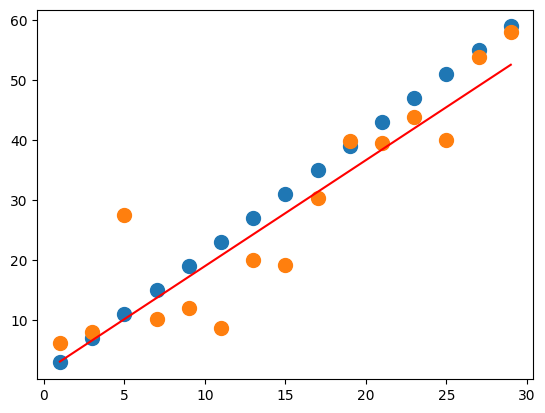

In [23]:
plt.plot(x, y, ".", markersize = 20)
plt.plot(x, y_random, ".", markersize = 20)
plt.plot(x, y_hat, color = "r")

plt.show()

## sklearn learn Package 사용하기

In [14]:
x_2d  = x.reshape(-1, 1)
print("Shape = ", x_2d.shape)
print("x = \n", x_2d)

Shape =  (15, 1)
x = 
 [[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]
 [21]
 [23]
 [25]
 [27]
 [29]]


In [15]:
## Regression class instance
lr = LinearRegression()
lr.fit(x_2d, y_random)
print(lr.coef_, lr.intercept_)

[1.76729841] 1.3788168153057256


In [27]:
## Linear regression performace metrics
lr.score(x_2d, y_random)

0.832320464202554

In [19]:
## Estimated value
y_hatsk = lr.coef_*x + lr.intercept_

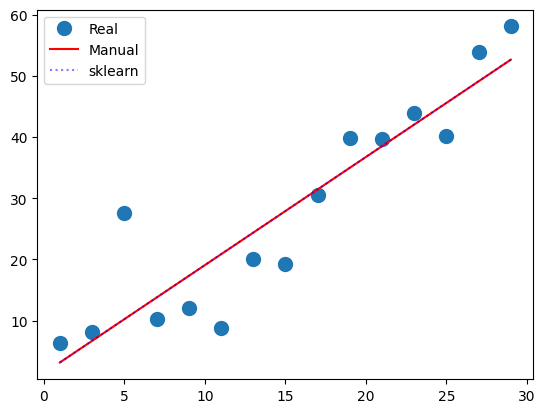

In [28]:
# plt.plot(x, y, ".", markersize = 20)
plt.plot(x, y_random, ".", markersize = 20, label = "Real")
plt.plot(x, y_hat, color = "r", label = "Manual")
plt.plot(x, y_hatsk, "b:", alpha = 0.5, label = "sklearn")
plt.legend()
plt.show()

In [ ]:
## 문제
'''
cars 자료를 읽고 설면변수 speed 와 반응변수 dist 를 이용하여 회귀분석을 실시 
'''